In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('exam.csv')
data.head(10)



,Exam1,Exam2,Pass
0,82.57048,61.00237,0
1,44.55748,55.37265,1
2,53.20288,26.78188,1
3,70.44303,29.08977,1
4,45.67506,65.17540,1
5,74.74542,64.31534,0
6,33.76201,40.21966,1
7,47.33119,48.18530,1
8,42.04160,24.58531,1
9,55.89800,35.38261,1


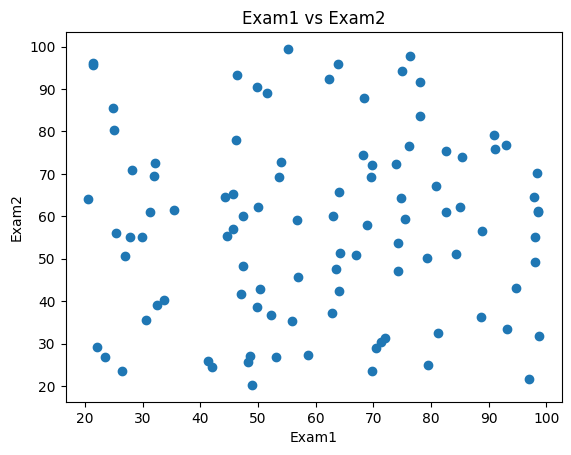

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data['Exam1'], data['Exam2'])
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exam1 vs Exam2')
plt.show()

In [ ]:
mask = data['Pass'] == 0
print(mask)


0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96     True
97     True
98    False
99    False
Name: Pass, Length: 100, dtype: bool


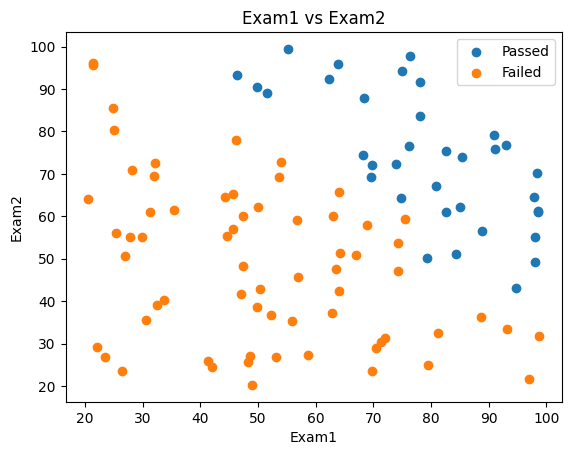

In [ ]:
fig2 = plt.figure()
passed = plt.scatter(data['Exam1'][mask], data['Exam2'][mask])
failed = plt.scatter(data['Exam1'][~mask], data['Exam2'][~mask])
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exam1 vs Exam2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [ ]:
x = data.drop(['Pass'],axis = 1)
y = data['Pass']
x1 = data['Exam1']
x2 = data['Exam2']
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

y_pred = model.predict(x)
print(y_pred)

[0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

0.98


In [ ]:
#test model
y_test = model.predict([[70,70]])
if y_test == 1:
    print('Failed')
else:
    print('Passed')


Passed


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
model.intercept_
model.coef_
theta0=model.intercept_
theta1,theta2 = model.coef_[0][0],model.coef_[0][1]
print(theta0,theta1,theta2)


[66.11319354] -0.4987429300831329 -0.4948734290242729


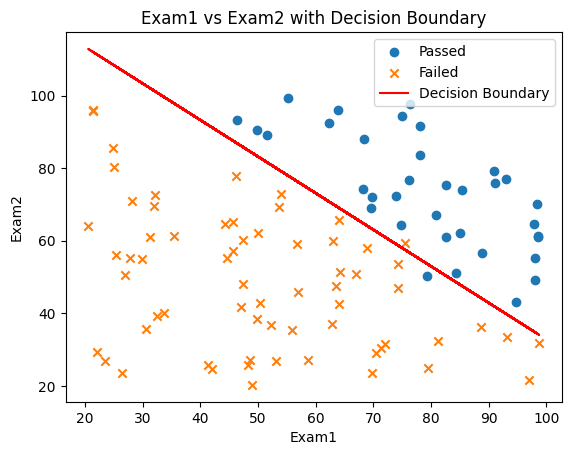

In [ ]:

x2_new = -(theta0 + theta1*x1)/theta2

fig3 = plt.figure()
passed = plt.scatter(data['Exam1'][mask], data['Exam2'][mask], marker='o', label='Passed') #Added marker and label
failed = plt.scatter(data['Exam1'][~mask], data['Exam2'][~mask], marker='x', label='Failed') #Added marker and label

plt.plot(x1,x2_new, color='red', label='Decision Boundary') # Added color and label

plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exam1 vs Exam2 with Decision Boundary') # Added title
plt.legend() # Show the legend with labels
plt.show()


In [ ]:
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)


          x1        x2         x1_2         x2_2        x1_x2
0   82.57048  61.00237  6817.884167  3721.289146  5036.994972
1   44.55748  55.37265  1985.369024  3066.130368  2467.265745
2   53.20288  26.78188  2830.546440   717.269096  1424.873148
3   70.44303  29.08977  4962.220476   846.214719  2049.171541
4   45.67506  65.17540  2086.211106  4247.832765  2976.890306
..       ...       ...          ...          ...          ...
95  88.69045  36.24404  7865.995921  1313.630436  3214.500217
96  78.14916  83.65214  6107.291209  6997.680527  6537.344473
97  98.51555  61.21075  9705.313592  3746.755916  6030.210702
98  50.39774  42.93496  2539.932197  1843.410790  2163.824951
99  62.97964  60.06331  3966.435055  3607.601208  3782.765641

[100 rows x 5 columns]


In [ ]:
model_new = LogisticRegression()
model_new.fit(x_new,y)

y_pred_new = model_new.predict(x_new)
print(y_pred_new)

[0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred_new))
x_new = x1.sort_values()

0.98


In [ ]:
theta0 = model_new.intercept_
theta1,theta2,theta3,theta4,theta5 = model_new.coef_[0][0], model_new.coef_[0][1], model_new.coef_[0][2], model_new.coef_[0][3], model_new.coef_[0][4]
a = theta4
b = theta5*x_new + theta2
c = theta0 + theta1*x_new + theta3*x_new*x_new
X2_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
print(X2_new_boundary)

57    -40.607793
39    -41.402903
52    -41.435223
49    -42.270413
38    -43.725079
         ...    
26   -129.906769
85   -130.170692
97   -130.408942
86   -130.412660
62   -130.681570
Name: Exam1, Length: 100, dtype: float64


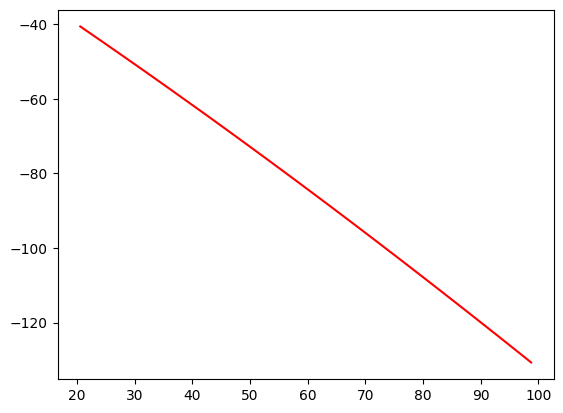

In [ ]:
fig4 = plt.figure()
plt.plot(x_new, X2_new_boundary, color='red', label='Decision Boundary')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


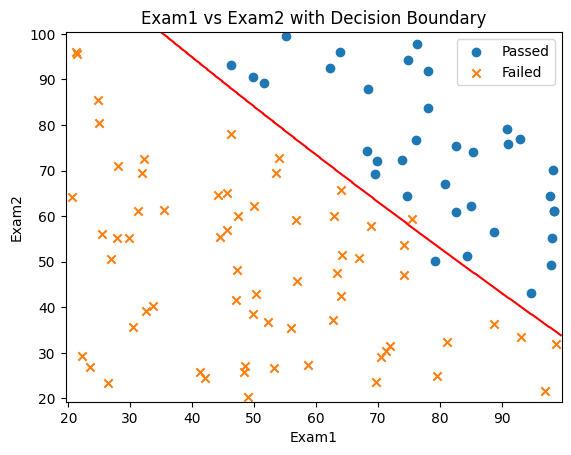

In [ ]:
fig5 = plt.figure()
passed = plt.scatter(data['Exam1'][mask], data['Exam2'][mask], marker='o', label='Passed') #Added marker and label
failed = plt.scatter(data['Exam1'][~mask], data['Exam2'][~mask], marker='x', label='Failed') #Added marker and label
x1_min, x1_max = data['Exam1'].min() - 1, data['Exam1'].max() + 1
x2_min, x2_max = data['Exam2'].min() - 1, data['Exam2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))

# 计算预测结果
Z = model_new.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel()*yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线
plt.contour(xx, yy, Z, levels=[0.5], colors='red')

plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exam1 vs Exam2 with Decision Boundary') # Added title
plt.legend() # Show the legend with labels
plt.show()